In [1]:
import tweepy
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')

from textblob import TextBlob
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\irish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Enter your twitter credentials here
consumer_key = "ATr3GPX2ECzzrQu1NWPSz1cpU"
consumer_secret = "VdUHLsnmPon7RDG5Y1IwTHCndg5kLTd4yBbZXUQ7q0sLS7yXK0"
access_token= "1516171293766389765-cZBHtFeMbwzupeYnOb5B142zNLHyb1"
access_token_secret= "lBCtCP0vCQwkUUIJFqzSTzepsXpbieqyJnVLeLhDOvWhz"

In [3]:
# Twitter authentication and the connection to Twitter Streaming API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [7]:
words = ['ireland farming', 'irish beef', 'irish pork', 'irish lamb']
train = pd.DataFrame()
#https://docs.tweepy.org/en/stable/api.html

In [8]:
# For search date parameters / label will be in your Dev enviorment label
# https://developer.twitter.com/en/account/environments
for word in words:
    tweets = tweepy.Cursor(api.search_full_archive, label='CA2Agriculture', query=word,
                       fromDate='20070101000', toDate='20200101000').items(1000)
    for tweet in tweets:
        temp = pd.DataFrame.from_dict(tweet._json, orient='index')
        temp = temp.T
        temp = temp[['created_at', 'id', 'text','geo', 'coordinates','retweeted','lang']]
        train= pd.concat([train, temp], axis=0)
train.reset_index(inplace=True, drop=True)

train['clean_tweet'] = train['text'].apply(lambda x : " ".join(x.lower() for x in x.split()))

In [ ]:
# Tweet search only
for word in words:
    tweets = tweepy.Cursor(api.search_tweets, q=word+'-filter:retweets', lang='en', tweet_mode='extended').items(500)
    for tweet in tweets:
        temp = pd.DataFrame.from_dict(tweet._json, orient='index')
        temp = temp.T
        temp = temp[['created_at', 'id', 'full_text','geo', 'coordinates','retweeted','lang']]
        train= pd.concat([train, temp], axis=0)
train.reset_index(inplace=True, drop=True)

train['clean_tweet'] = train['full_text'].apply(lambda x : " ".join(x.lower() for x in x.split()))

In [10]:
train['clean_tweet'] = train['clean_tweet'].str.replace("[^\w\s]", "")

C:\Users\irish\AppData\Local\Temp\ipykernel_45184\2542136566.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train['clean_tweet'] = train['clean_tweet'].str.replace("[^\w\s]", "")


In [11]:
train['sentiment'] = train['clean_tweet'].apply(lambda x : TextBlob(x).sentiment[0])

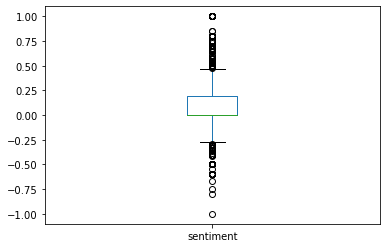

In [12]:
train['sentiment'].plot(kind='box');

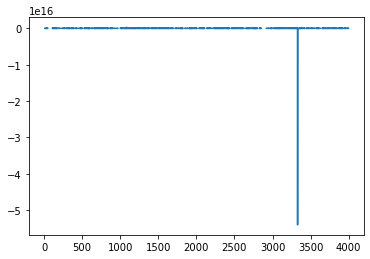

In [13]:
train['sentiment'].pct_change().plot();